In [148]:
import pandas as pd 
data = pd.read_csv("student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


Inspect the dataset


Columns:  ['name', 'hours', 'score', 'gender', 'grades', 'class']

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset Completeness: 
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency: 
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object

Datset describe: 
           hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.

class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64

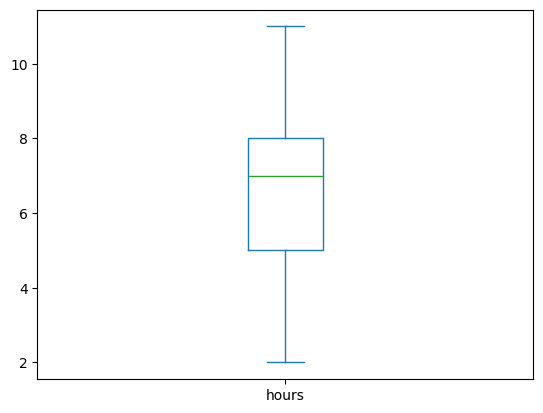

In [149]:
print('Columns: ', data.columns.tolist())

#dataset basic info
print("\nDataset Info: ")
print(data.info())

#check for missing values
print("\nDataset Completeness: ")
print(data.isnull().sum())

#all numeric cols should be numeric
print("\nDataset Consistency: ")
print(data.dtypes)

#accuracy
print("\nDatset describe: ")
print(data.describe())
data['hours'].plot(kind='box')

#is the data upto date?
print("\nDataset time keeping: ")
print("\nNo timestamps")

#BIAS check
print("\nDataset bias")
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
data['class'].value_counts(normalize=True)

## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `student_scores.csv` (demo dataset) |
| **Description**     | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | *None* (Exploratory dataset only) |
| **Number of Rows**  | 92 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` → `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner**           | Student / Notebook Author |
| **Last Updated**    | 2025-12-19 |

## Separate Features and Labels

In [150]:
categorical = data.select_dtypes(include='object').columns
numerical = data.select_dtypes(exclude='object').columns

print("Categorical features:", list(categorical))
print("Numerical features:", list(numerical))

#encode class column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data['class_encoded'] = le.fit_transform(data['grades'])

X = data[['hours']]
y = data['score']

Categorical features: ['name', 'gender', 'grades', 'class']
Numerical features: ['hours', 'score']


## Data distribution

Text(0.5, 1.0, 'Distribution of student scores')

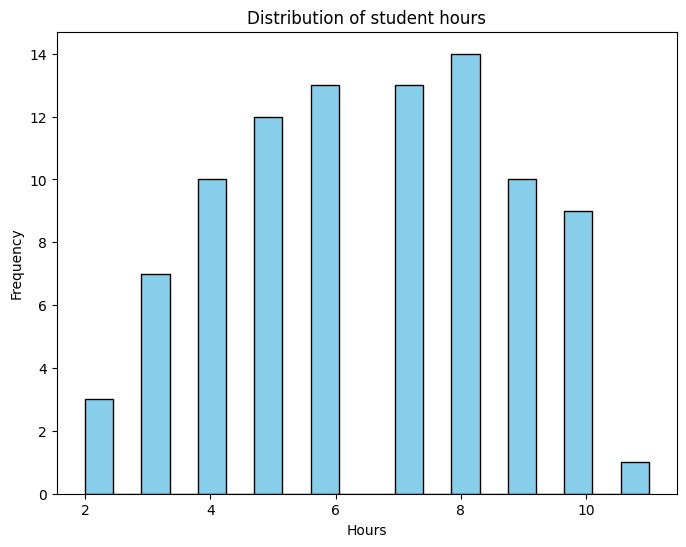

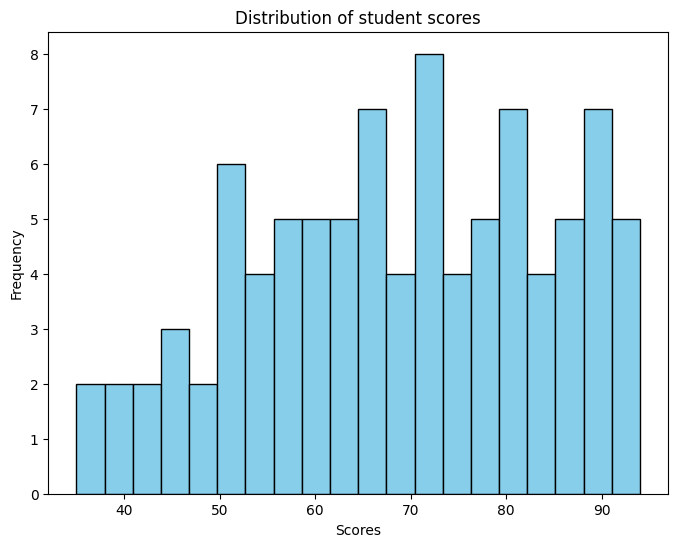

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of student hours')

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of student scores')

## Split the data

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## Train the model

In [153]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Model coefficient (Slope): ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model coefficient (Slope):  6.804392044598464
Model Intercept:  24.617635980111494


## Make predictions

In [154]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
pred_data = {'Y_Prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}

prediction_table = pd.DataFrame(pred_data)
print(prediction_table)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMSE : {mse:.2f}")

    Y_Prediction  Y_test
0          79.05      81
1          85.86      84
2          45.03      40
3          38.23      36
4          79.05      76
5          79.05      82
6          72.25      75
7          85.86      85
8          58.64      60
9          45.03      43
10         58.64      59
11         79.05      79
12         72.25      73
13         45.03      46
14         51.84      52
15         72.25      72
16         65.44      63
17         92.66      91
18         65.44      66

MSE : 4.24


In [155]:
#from sklearn.metrics import mean_squared_error

#new_input = pd.DataFrame([[1]],columns=['hours'])
#y_pred = model.predict(new_input)
#print(y_pred)

#mse = mean_squared_error(new_input,y_pred)
#print("MSE: ", mse)

# Plot the line of regression

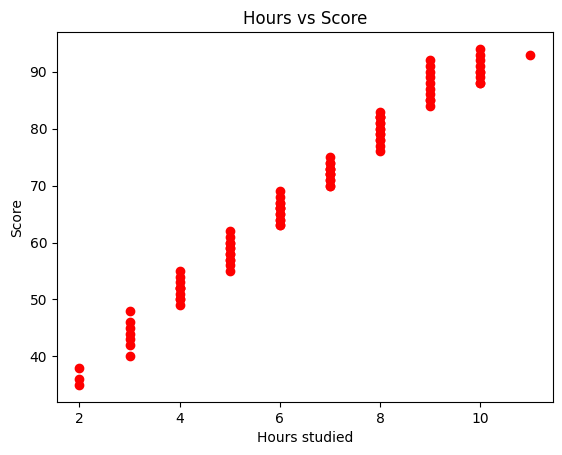

In [156]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color='red')
#plt.plot(X, model.predict(X), color='blue')
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.show()

## Actual vs Predicted Plot

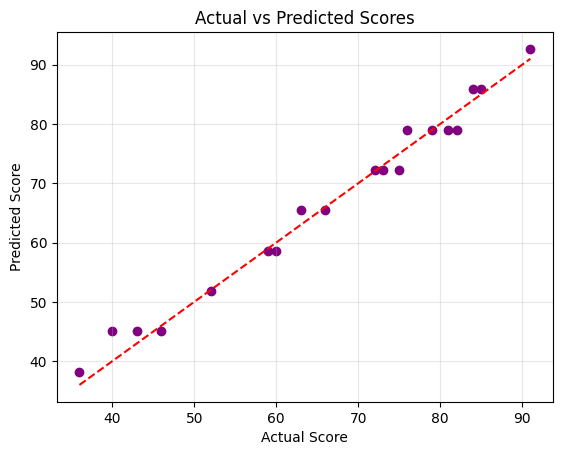

In [157]:
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha=0.3)
plt.show()

 Dataset Loaded Successfully!

   Hours  Score
0      1     35
1      2     42
2      3     51
3      4     60
4      5     68
5      6     77
6      7     85
7      8     90
X value:
    Hours
0      1
1      2
2      3
3      4
4      5
y value:
 0    35
1    42
2    51
3    60
4    68
Name: Score, dtype: int64
Model Coefficient (Slope): 8.166666666666671
Model Intercept: 26.74999999999998

 Actual vs Predicted Scores: 

   Hours  Score  Predicted_score
0      1     35            34.92
1      2     42            43.08
2      3     51            51.25
3      4     60            59.42
4      5     68            67.58
5      6     77            75.75
6      7     85            83.92
7      8     90            92.08


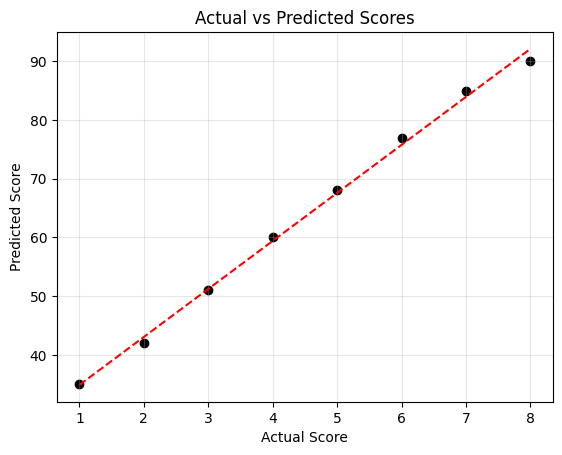


MSE : 1.10


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Create dataset
data = {
    "Hours": [1, 2, 3, 4, 5, 6, 7, 8],
    "Score": [35, 42, 51, 60, 68, 77, 85, 90]
}
df = pd.DataFrame(data)
print(" Dataset Loaded Successfully!\n")
print(df)

#separate x and y 
X = df[["Hours"]]
y = df['Score']

print("X value:\n", X.head())
print("y value:\n", y.head())

#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)

#Predicting values
y_pred = model.predict(X)
df["Predicted_score"] = y_pred.round(2)
print("\n Actual vs Predicted Scores: \n")
print(df)

#Plotting the results
plt.scatter(X,y, color='black')
plt.plot(X, y_pred, color='red', linestyle='--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(alpha=0.3)
plt.show()

mse = mean_squared_error(y, y_pred)
print(f"\nMSE : {mse:.2f}")

In [159]:
newinp = pd.DataFrame([[1]],columns=['Hours'])
print(model.predict(newinp))

[34.91666667]
